In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import sys
sys.path.append("../")

from htmresearch.support.gridcells.mdist.utils import map_to_hypertorus_A
from unique_hypercube_size import create_random_A

%load_ext autoreload
%autoreload 2



In [3]:
def get_samples_from_unit_cube(k, n):
    cube_shape = (np.ones(k)*n).astype(int)
    X = np.indices(cube_shape).reshape((k,n**k)).T
    X = X/float(n) - 0.5
    
    return X


def compute_code_book(A, X, epsilon):
    m = len(A)
    Q = map_to_hypertorus_A(A, X)
    Q = Q.reshape((-1,2*m))
    Q_ = Q//epsilon    
    code_book = [ tuple(q) for q in Q_ ]
    
    return code_book


def compute_number_of_used_codes(m,k,A,epsilon):
    n = 20
    X = get_samples_from_unit_cube(k, n)
    code_book   = compute_code_book(A, X, epsilon)
    used_codes  = set(code_book)

    return len(used_codes)




In [4]:

m = 6
k = 3

# S = np.sqrt(2)**np.arange(m)
S = 1. + np.random.sample(m)
A = create_random_A(m,k,S)


A = A.reshape((2*m, k))

Q, R   = np.linalg.qr(A)


print Q.shape
print R.shape

print np.dot(Q.T, Q)

print 




(12, 3)
(3, 3)
[[  1.00000000e+00  -8.32667268e-17   0.00000000e+00]
 [ -8.32667268e-17   1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]



In [ ]:
# plt.style.use('ggplot')
# plt.style.use('default')
plt.style.use('seaborn-whitegrid')


fig, ax = plt.subplots(1, m, figsize=(2*m, 2));
plt.suptitle("Action tensor (rescaled)", y=1.2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

for i in range(m):
    ax[i].set_title("Module {}".format(i))
    ax[i].set_xlim(-2,2)
    ax[i].set_ylim(-2,2)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

    r1 = A[i,0,:] * S[i]
    r2 = A[i,1,:] * S[i]
#     r1 = A[i,0,:] 
#     r2 = A[i,1,:] 

    ax[i].quiver(0.0,0.0,r1[:2],r2[:2], angles='xy', scale_units='xy', scale=1)
    for l in range(2,k):
        ax[i].quiver(0.0,0.0,r1[l],r2[l], angles='xy', scale_units='xy', scale=1, color="red")

plt.show()



fig, ax = plt.subplots(1, 1);
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.4, hspace=None)

ax.set_title("Gridscales")
ax.bar(range(m), S)

plt.show()

894
[    23     35     39 ..., 124869 124943 124992]


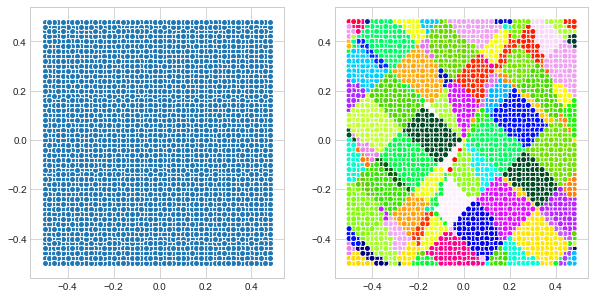

In [8]:

m = 3
k = 3
S = np.sqrt(2)**np.arange(m)
A = create_random_A(m,k,S)


num = 50
perm = np.random.permutation(num**k)
X = get_samples_from_unit_cube(k, num)
X = X[perm]
code_book = compute_code_book(A, X, epsilon=0.2)

unique_codes = set(code_book)

items = zip(unique_codes, range(len(unique_codes))) 

color_book = dict(items)

cs = np.array([ color_book[c] for c in code_book])

fig, ax = plt.subplots(1, 2, figsize=(10, 5));

print len(unique_codes)



p = np.where(np.absolute(X[:,2]) < 0.01)[0]
print p
# ax[0].scatter(X[p,0],X[p,1], edgecolor="white")
# ax[1].scatter(X[p,0],X[p,1], edgecolor="white", c=cs[p], cmap="gist_ncar")

ax[0].scatter(X[p,0],X[p,1], edgecolor="white")
ax[1].scatter(X[p,0],X[p,1], edgecolor="white", marker="o", c=cs[p], cmap="gist_ncar")






In [10]:
m_max      = 6
k_max      = 4
num_trials = 100
phase_resolution = 0.2

num_used_codes = np.zeros((m_max, k_max, num_trials))
det = np.zeros((m_max, k_max, num_trials))
ratio_of_used_codes = np.zeros((m_max, k_max, num_trials))

num_locs_total = (1./phase_resolution)**(2*np.arange(1,m_max+1))

for m in range(1, m_max + 1):    
    S = np.sqrt(2)**np.arange(m) 
#     S = 1.63**np.arange(m)    
    
    for k in range(1, k_max + 1):
        for t in range(num_trials):
    
            A  = create_random_A(m,k,S)
        
            uc = compute_number_of_used_codes(m, k, A, phase_resolution)
            num_used_codes[m-1, k-1, t] = uc


            if 2*m >= k:
                Q, R   = np.linalg.qr(A[:m,:,:k].reshape((2*m,k)))
                vol_k = np.absolute(np.linalg.det(R))
                
                det[m-1,k-1, t] = vol_k
                vol_fibre = 0.22**(2*m - k)
                ratio_of_used_codes[m-1,k-1, t] = vol_k * vol_fibre
            

    
    

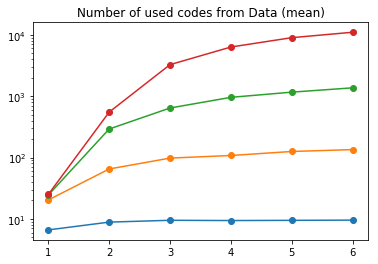

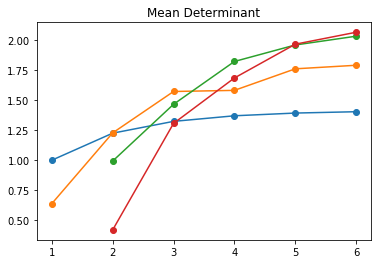

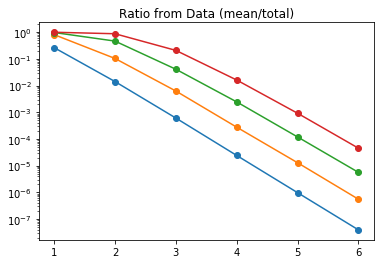

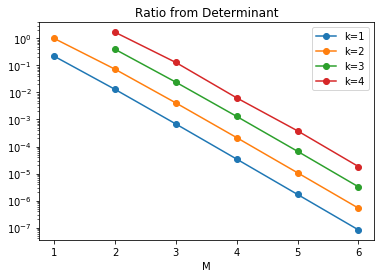

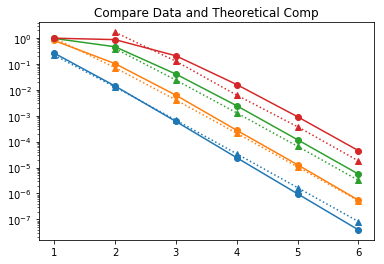

In [11]:
mean_num = np.mean(num_used_codes, axis=2)

mean_ratio = np.max(ratio_of_used_codes, axis=2)


# fig, ax = plt.subplots(1, m, figsize=(2*m, 2));
# plt.suptitle("Action tensor (rescaled)", y=1.2)
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
#                 wspace=None, hspace=None)


plt.title("Number of used codes from Data (mean)")
plt.yscale("log")
for k in range(k_max):
    plt.plot(np.arange(1,m_max+1),  mean_num[:,k], 
             c="C{}".format(k),
             marker="o", label="k={}".format(k+1))
    
plt.show()

plt.title("Mean Determinant")
# plt.yscale("log")
for k in range(k_max):
    valid = 2*np.arange(1,m_max+1) > k
    plt.plot(np.arange(1,m_max+1)[valid],  np.mean(det[:,k,:], axis=1)[valid], 
             c="C{}".format(k),
             marker="o", label="k={}".format(k+1))
plt.show()

plt.title("Ratio from Data (mean/total)")
plt.yscale("log")
for k in range(k_max):
    plt.plot(np.arange(1,m_max+1),  mean_num[:,k]/num_locs_total, 
             c="C{}".format(k),
             marker="o", label="k={}".format(k+1))
    
#     valid = 2*np.arange(1,m_max+1) > k
#     plt.plot(np.arange(1,m_max+1)[valid], mean_ratio[:,k][valid], 
#              linestyle=":",
#              marker="^", label="k={}".format(k+1))
plt.show()




plt.title("Ratio from Determinant")
plt.yscale("log")
for k in range(k_max):

    valid = 2*np.arange(1,m_max+1) > k
    plt.plot(np.arange(1,m_max+1)[valid], mean_ratio[:,k][valid], 
            c="C{}".format(k),
             marker="o", label="k={}".format(k+1))
    
plt.legend()
plt.xlabel("M")
plt.show()

plt.title("Compare Data and Theoretical Comp")
plt.yscale("log")
for k in range(k_max):
    plt.plot(np.arange(1,m_max+1),  mean_num[:,k]/num_locs_total, 
             c="C{}".format(k),
             marker="o", label="k={}".format(k+1))
    
    valid = 2*np.arange(1,m_max+1) > k
    plt.plot(np.arange(1,m_max+1)[valid], mean_ratio[:,k][valid], 
             linestyle=":",
             marker="^", label="k={}".format(k+1))
plt.show()

In [67]:
import pickle


filename = "locs_in_vol_e.p"

with open(filename,'wb') as f:
    pickle.dump(mean_num, f)
    
    



In [127]:
filename = "load_factor.p"

with open(filename,'wb') as f:
    pickle.dump(mean_ratio, f)
